In [73]:
import numpy as np
import pandas as pd
import random
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.mlab as mlab
import seaborn as sns
import time
from keras.layers.advanced_activations import LeakyReLU

In [2]:
file_path = '../../data/input/integrated_data_dummy.csv'

data = pd.read_csv(file_path)

In [3]:
data.isnull().any()

route                                      False
tripNum                                    False
shapeSequence                              False
shapeLat                                   False
shapeLon                                   False
                                           ...  
alertTypeSB_POLICE                         False
alertTypeSB_ROAD_CLOSED                    False
jamBlockTypeSB_-                           False
jamBlockTypeSB_ROAD_CLOSED_CONSTRUCTION    False
jamBlockTypeSB_ROAD_CLOSED_EVENT           False
Length: 456, dtype: bool

In [3]:
target_col = ['headway']
bb_col = ['busBunching']
features = list(set(list(data.columns))-set(target_col)-set(bb_col))

In [ ]:
# Normalize data


In [6]:
# Balancing data


In [4]:
# Get label column and remove it from data
y = data['headway']
data.drop('headway', axis=1, inplace=True)
data.drop('busBunching', axis=1, inplace=True)

In [5]:
# Making training and test data: 80% Training, 20% Test
random.seed(15) #to get always the same set
train_X, test_X, train_Y, test_Y = train_test_split(data, y, test_size=0.20, random_state=7)

### ANN

In [76]:
# Getting training time
start = time.time()

# Define model - Deep Feed Forward
model = Sequential()
model.add(Dense(200, input_dim=len(features), activation= "relu"))
model.add(Dense(150, activation= "relu"))
model.add(Dense(150, activation= "relu"))
# model.add(Dense(150, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(100, activation= "relu"))
# model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(50, activation= "relu"))
# model.add(Dense(50, activation= "relu"))
# model.add(Dense(50, activation= "relu"))
# model.add(Dense(50, activation= "relu"))
# model.add(Dense(50, activation= "relu"))
# model.add(Dense(50, activation= "relu"))
# model.add(Dense(25, activation= "relu"))
# model.add(Dense(25, activation= "relu"))
# model.add(Dense(25, activation= "relu"))
# model.add(Dense(25, activation= "relu"))
# model.add(Dense(25, activation= "relu"))
model.add(Dense(25, activation= "relu"))
model.add(Dense(25, activation= "relu")) #20 hidden layers
model.add(Dense(1))
#print(model.summary()) #Print model Summary

# Compile model
model.compile(loss= "mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])
# Fit Model
model_history = model.fit(train_X, train_Y, epochs=100, batch_size=128)

end = time.time()
print("Execution time:" + str((end - start)/60) + "min")

Epoch 1/100
1326219/1326219 [==============================] - 42s 32us/step - loss: 3951.8593 - mean_squared_error: 3951.8593
Epoch 2/100
1326219/1326219 [==============================] - 41s 31us/step - loss: 3804.2145 - mean_squared_error: 3804.2145
Epoch 3/100
1326219/1326219 [==============================] - 41s 31us/step - loss: 3728.0353 - mean_squared_error: 3728.0353
Epoch 4/100
1326219/1326219 [==============================] - 41s 31us/step - loss: 3671.2475 - mean_squared_error: 3671.2475
Epoch 5/100
1326219/1326219 [==============================] - 41s 31us/step - loss: 3621.7073 - mean_squared_error: 3621.7073
Epoch 6/100
1326219/1326219 [==============================] - 41s 31us/step - loss: 3592.0176 - mean_squared_error: 3592.0176
Epoch 7/100
1326219/1326219 [==============================] - 41s 31us/step - loss: 3560.6795 - mean_squared_error: 3560.6795
Epoch 8/100
1326219/1326219 [==============================] - 41s 31us/step - loss: 3538.4337 - mean_squared_e

1326219/1326219 [==============================] - 41s 31us/step - loss: 4092.3205 - mean_squared_error: 4092.3205
Epoch 66/100
1326219/1326219 [==============================] - 41s 31us/step - loss: 4092.3033 - mean_squared_error: 4092.3033
Epoch 67/100
1326219/1326219 [==============================] - 41s 31us/step - loss: 4092.3444 - mean_squared_error: 4092.3444
Epoch 68/100
1326219/1326219 [==============================] - 41s 31us/step - loss: 4092.3723 - mean_squared_error: 4092.3723
Epoch 69/100
1326219/1326219 [==============================] - 41s 31us/step - loss: 4092.3438 - mean_squared_error: 4092.3438
Epoch 70/100
1326219/1326219 [==============================] - 41s 31us/step - loss: 4092.3235 - mean_squared_error: 4092.3235
Epoch 71/100
1326219/1326219 [==============================] - 41s 31us/step - loss: 4092.3738 - mean_squared_error: 4092.3738
Epoch 72/100
1326219/1326219 [==============================] - 41s 31us/step - loss: 4092.3716 - mean_squared_error:

### Tuning hiper parameters

In [6]:
def train_model(activation, loss, optimizer, batch_size):
    # Define model
    model = Sequential()
    model.add(Dense(200, input_dim=len(features), activation=activation))
    model.add(Dense(100, activation=activation))
    model.add(Dense(50, activation=activation))
    model.add(Dense(1))
    #print(model.summary()) #Print model Summary

    # Compile model
    model.compile(loss=loss, optimizer=optimizer, metrics=["mean_squared_error"])
    model.fit(train_X, train_Y, epochs=100, batch_size=batch_size)
    return model

In [7]:
parameters = {'activation': ['relu', 'elu', 'tanh'],
              'optimizer': ['adam', 'nadam', 'sgd'],
              'loss': ['mse', 'mape'],
              'batch_size': [16, 32, 64, 128]}

model = KerasRegressor(build_fn=train_model)
gridSearch = GridSearchCV(estimator=model,
                          param_grid=parameters,
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True).fit(train_X, train_Y)

/home/veruska/.local/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/veruska/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
W0814 01:05:15.541956 140100025235264 deprecation_wrapper.py:119] From /home/veruska/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0814 01:05:15.559023 140100025235264 deprecation_wrapper.py:119] From /home/veruska/.local/lib/python3.6/site-packages/keras/backend/tensorflow_back

Epoch 1/100
40000/40000 [==============================] - 1s 31us/step - loss: 63844.0255 - mean_squared_error: 63844.0255
Epoch 2/100
40000/40000 [==============================] - 1s 26us/step - loss: 5036.1750 - mean_squared_error: 5036.1750
Epoch 3/100
40000/40000 [==============================] - 1s 26us/step - loss: 5629.8579 - mean_squared_error: 5629.8579
Epoch 4/100
40000/40000 [==============================] - 1s 26us/step - loss: 9670.6787 - mean_squared_error: 9670.6787
Epoch 5/100
40000/40000 [==============================] - 1s 26us/step - loss: 5176.1600 - mean_squared_error: 5176.1600
Epoch 6/100
40000/40000 [==============================] - 1s 26us/step - loss: 4817.3493 - mean_squared_error: 4817.3493
Epoch 7/100
40000/40000 [==============================] - 1s 26us/step - loss: 6650.6567 - mean_squared_error: 6650.6567
Epoch 8/100
40000/40000 [==============================] - 1s 26us/step - loss: 4392.3912 - mean_squared_error: 4392.3912
Epoch 9/100
40000/4000

In [8]:
print('Grid Search Best score', gridSearch.best_score_)
print('Grid Search Best Parameters', gridSearch.best_params_)
print('Execution time', gridSearch.refit_time_)

Grid Search Best score -2629.2178188476564
Grid Search Best Parameters {'activation': 'relu', 'batch_size': 128, 'loss': 'mse', 'optimizer': 'adam'}
Execution time 106.91241836547852


### Evaluating model

In [47]:
width = 5
height = 5

In [62]:
model_history.history

{'loss': [9719.793547904861,
  3935.930743456103,
  3830.7724163004173,
  3754.0039719552315,
  3702.296035726712,
  3661.5665973947175,
  3659.419334197153,
  3609.664904621769,
  3585.232875200248,
  3564.307705736544,
  3548.3245725723864,
  3537.283753215311,
  3537.5375414261052,
  3514.617517561725,
  3503.0652174104334,
  3494.6122227279675,
  3481.6285083373746,
  3471.4210978729757,
  3460.059823702152,
  3458.632543523273,
  3443.338885253408,
  3436.8017943833656,
  3426.547255485398,
  3413.4037325035783,
  3407.56252244379,
  3405.0304841714515,
  3400.1282053584846,
  3429.154764451997,
  3435.232355345792,
  3420.375499364067,
  3412.1994185797917,
  3434.1465224715844,
  3427.049659083506,
  3466.6842942629387,
  3404.769456122975,
  3428.3537209279034,
  3378.1972421103715,
  3363.274286973496,
  3343.377708423329,
  3334.7326478435903,
  3334.5637238409463,
  3323.820537112784,
  3317.462870513509,
  3299.449538704297,
  3299.057959094073,
  3304.8255496933166,
  3290

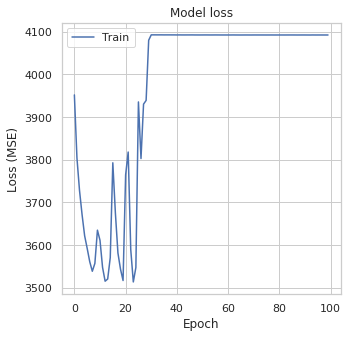

In [77]:
# Plot training & validation accuracy values
# plt.plot(model_history.history['mean_squared_error'])
# plt.title('Model MSE')
# plt.ylabel('MSE')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

# Plot training & validation loss values
plt.plot(model_history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [78]:
pred = model.predict(test_X)
mse = mean_squared_error(test_Y, pred)
rmse_ann = np.sqrt(mse)
print(rmse_ann)

64.17888961131786


In [67]:
pred

array([[17.760735],
       [31.638517],
       [34.826824],
       ...,
       [39.276886],
       [31.426003],
       [36.910225]], dtype=float32)

In [68]:
print(min(pred))
print(max(pred))

[14.146067]
[865.256]


Text(0.5, 1.0, 'Residuals')

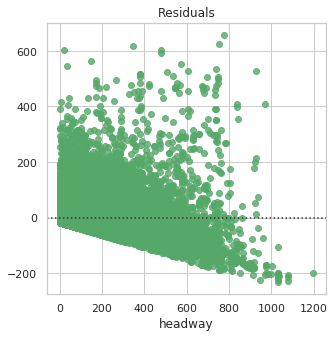

In [69]:
sns.set(style="whitegrid")

# Plot the residuals after fitting a linear model
sns.residplot(test_Y, pred, color="g").set_title('Residuals')

Residuals should not have a standard.

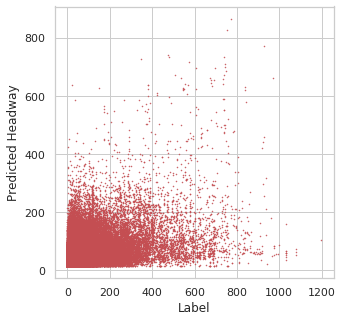

In [70]:
# Print all error to see if there is standard or some big outliers
plt.figure()
plt.plot(test_Y, pred, 'ro', ms=0.5)
plt.xlabel('Label')
plt.ylabel('Predicted Headway')
plt.show()

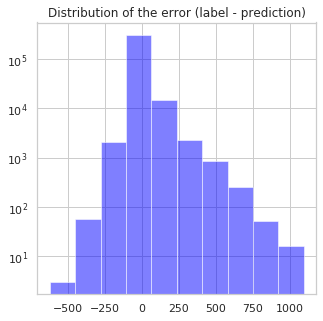

In [71]:
diff = test_Y - np.array(pred).flatten()
num_bins = 10
plt.hist(diff, num_bins, facecolor='blue', alpha=0.5, log=True)
plt.title('Distribution of the error (label - prediction)')
plt.rcParams["figure.figsize"] = (width,height) 
plt.show()

In [ ]:
model_history.history